<a href="https://colab.research.google.com/github/pablomerizalde/CO0371-Analitica-de-negocios/blob/main/Arboles/01_arboles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas scikit-learn matplotlib openpyxl

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier  #Modelo de Árbol de Decisión
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt

In [ ]:
#nxl='./../datos/0. SolicitantesCrédito(USD).xlsx'
nxl= 'https://raw.githubusercontent.com/pablomerizalde/CO0371-Analitica-de-negocios/main/datos/0.%20SolicitantesCr%C3%A9dito(USD).xlsx'
XDB=pd.read_excel(nxl,sheet_name=1)  #Base de datos AAA
XDB=XDB.dropna()  #Elimina celdas erroneas o N/A
XDB=XDB[['Edad','Perscargo','Ingresos','Egresos','Monto (EAD)','PreApr']]
#Separar variables de entrada y variables de salida
XD=XDB[['Edad','Perscargo','Ingresos','Egresos','Monto (EAD)']] #Variables Entrada
yd=XDB['PreApr'] #Variable de referencia-salida

XD.head()

,Edad,Perscargo,Ingresos,Egresos,Monto (EAD)
0,38,0,1356.14400,1685.622667,625.562230
1,51,1,286.01600,364.462000,140.031984
2,37,0,517.46325,629.208889,284.564492
3,29,0,473.27000,551.616889,309.647588
4,42,4,750.09175,806.715778,500.663578


In [ ]:
mar=DecisionTreeClassifier(criterion='gini',max_depth=4)
mar.fit(XD,yd)

export_graphviz(mar, out_file='tree.dot',
                feature_names=['Edad','Perscargo','Ingresos','Egresos','Monto (EAD)'],
                class_names=['No Aprobado','Aprobado'],
                rounded=True, filled=True)
with open("tree.dot") as f:
    dot_data = f.read()

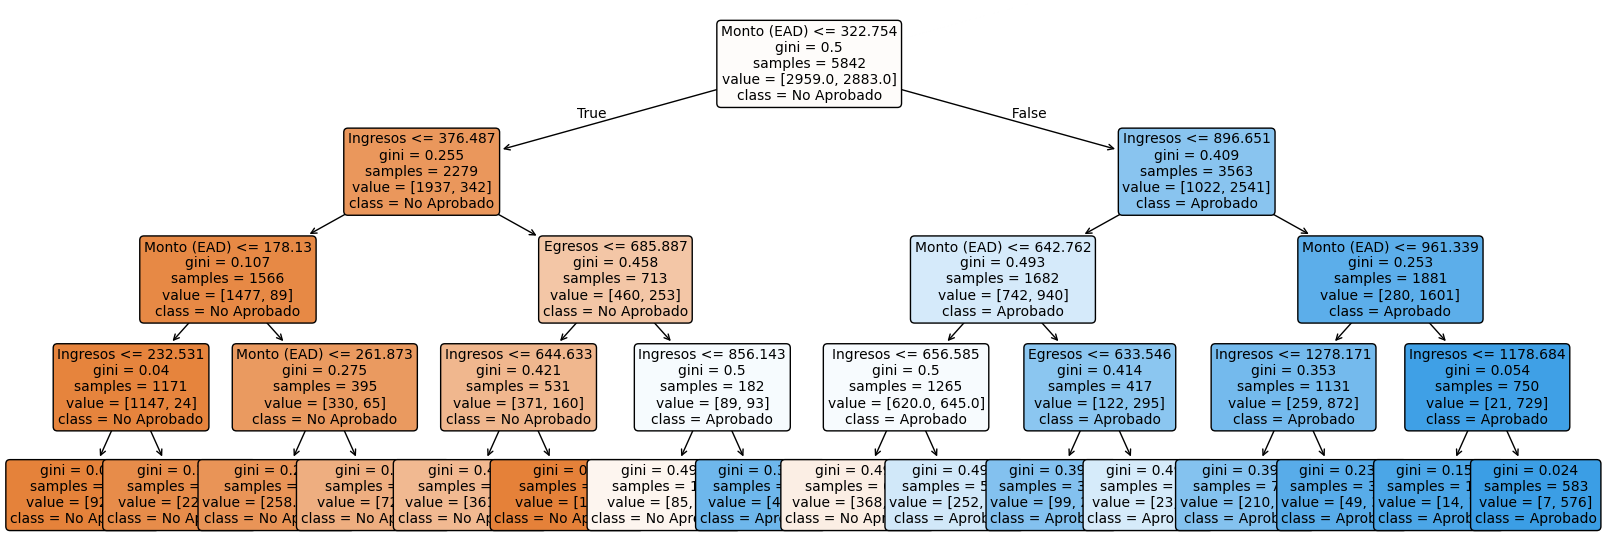

In [ ]:
tree=DecisionTreeClassifier(criterion='gini',max_depth=4)
tree.fit(XD,yd)


from sklearn.tree import plot_tree

plt.figure(figsize=(20, 7))

plot_tree(tree,
          filled=True,
          rounded=True,
          feature_names=['Edad','Perscargo','Ingresos','Egresos','Monto (EAD)'],
          class_names=['No Aprobado','Aprobado']
          , fontsize=10)

plt.show()

VN= 2301 FP= 658 FN= 644 VP= 2239
Exactitud= 0.7771311194796303
Tasa de Error= 0.22286888052036974
Sensibilidad= 0.7766215747485259
Especificidad= 0.7776275768840825
Precisión= 0.772868484639282
Predictividad frente a los negativos= 0.7813242784380305


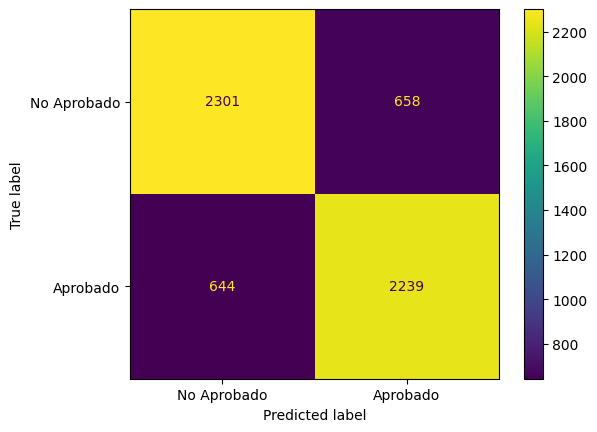

In [ ]:
ydp=tree.predict(XD)  #Vamos a estresar el modelo-backtesting
cm=confusion_matrix(yd,ydp)
ConfusionMatrixDisplay(cm,display_labels=['No Aprobado','Aprobado']).plot()
VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]
print('VN=',VN,'FP=',FP,'FN=',FN,'VP=',VP)

Ex=(VN+VP)/(VN+FP+FN+VP)
print('Exactitud=',Ex) #Comportamiento General del Modelo

Ter=(FP+FN)/(VN+FP+FN+VP)
print('Tasa de Error=',Ter) #Comportamiento Erroneo del Modelo

Sen=VP/(VP+FN)
print('Sensibilidad=',Sen) #Comportamiento Positivo del Modelo

Esp=VN/(VN+FP)
print('Especificidad=',Esp) #Comportamiento frente a los PreNegativo del Modelo

Prec=VP/(VP+FP)
print('Precisión=',Prec) #Comportamiento solamente contando los positivos

PredNeg=VN/(VN+FN)
print('Predictividad frente a los negativos=',PredNeg)
#Comportamiento solo contando con los negativos